<a href="https://colab.research.google.com/github/D-Shah28/Diabetese_Prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# import the dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and analysis

PIMA Diabetes dataset

In [7]:
# Load the data into pandas dataframe
diabetes_data = pd.read_csv('https://raw.githubusercontent.com/D-Shah28/Diabetese_Prediction/refs/heads/main/diabetes.csv')

In [8]:
# display first 5 rows of the dataframe
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# no of rows and columns
diabetes_data.shape

(768, 9)

In [10]:
#check for missing values
diabetes_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
# using statistical measure to understand the data
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
diabetes_data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 ->> Non Diabetic people

1 ->> Diabetic People

In [13]:
# Mean of diabetic and non diabetic people
diabetes_data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
#seperate the labels and data
X = diabetes_data.drop(columns='Outcome', axis = 1) # axis = 1 for column and axis = 0 for rows
Y = diabetes_data['Outcome']

In [15]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardisation

In [17]:
#load StandardScaler function
scaler = StandardScaler()

In [18]:
scaler.fit(X)

StandardScaler()

In [19]:
standardized_data = scaler.transform(X)

In [20]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [21]:
X = standardized_data
Y = diabetes_data['Outcome']

In [22]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the data into train and test data

In [23]:
# splitting the data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

# Startify is used here to split the data into equal distribution that is the diabetic and non diabetic
# cases should be splitted into train and test in equal proportion that is there should not be more dibetic
# data in train dataset or non diabetic data in test dataset or vice versa

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

Model ->> Support Vector Machine

In [25]:
# load the machine learning algorithm
classifier = svm.SVC(kernel='linear')

In [26]:
# training the support vector classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Evaluating the model created by finding the accuracy score

In [27]:
#accuracy score for training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy Score of training data:',training_data_accuracy)

Accuracy Score of training data: 0.7866449511400652


In [28]:
#accuracy score for test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy Score of training data:',test_data_accuracy)

Accuracy Score of training data: 0.7727272727272727


Note-: here the accuracy is more than only 70% as we are dealing with small amount fo data.

also this is the perfect example of training the model as the model is niether overfitted or underfitted as the accuracy score is almost similar to each other

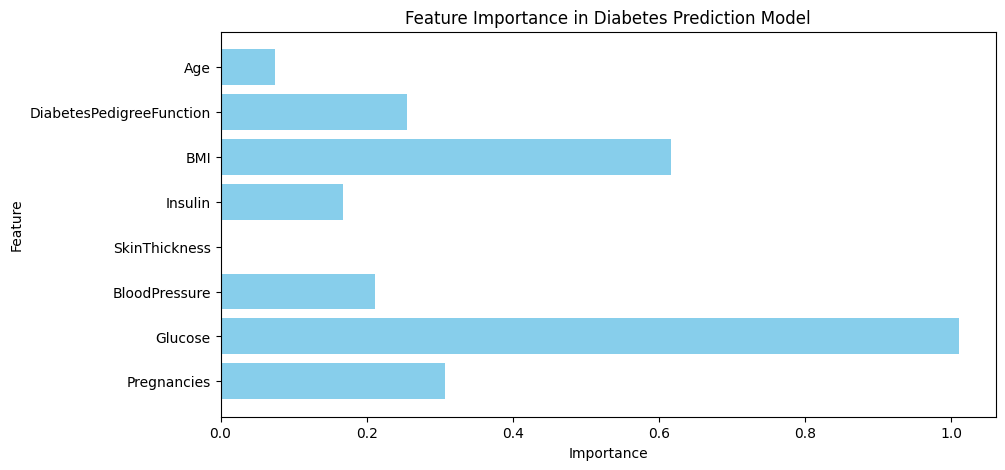

In [36]:
# Feature Importance
if hasattr(classifier, 'coef_'):
    feature_importance = np.abs(classifier.coef_).flatten()
    plt.figure(figsize=(10,5))
    plt.barh(diabetes_data.columns[:-1], feature_importance, color='skyblue')
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance in Diabetes Prediction Model")
    plt.show()
else:
    print("Feature importance is not available for this model.")

Making a predictive system

In [33]:
# Creating the predictive systeme for prediction
# Define column names (same as training data)
column_names = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

while True:
    # Initialize a list to store input data
    person_data = []

    # Collect data for a single patient
    print("\nEnter patient details:")
    for feature in column_names:
        value = float(input(f"{feature}: "))
        person_data.append(value)

    # Create a pandas DataFrame with the collected input data
    input_df = pd.DataFrame([person_data], columns=column_names)

    # Standardize the input data using the scaler
    std_input_data = scaler.transform(input_df)

    # Make prediction
    prediction = classifier.predict(std_input_data)[0]

    # Print the predicted output
    result = "Diabetic" if prediction == 1 else "Non-Diabetic"
    print(f"Patient Diagnosis: {result}")

    # Ask user if they want to continue or exit
    choice = input("\nDo you want to predict for another patient? (yes to continue, any key to exit): ").strip().lower()
    if choice != 'yes':
        print("Exiting the program...")
        break



Enter patient details:
Pregnancies: 2
Glucose: 23
BloodPressure: 12
SkinThickness: 23
Insulin: 12
BMI: 123
DiabetesPedigreeFunction: 12
Age: 22
Patient Diagnosis: Diabetic

Do you want to predict for another patient? (yes to continue, any key to exit): 1
Exiting the program...
